# Micycle Analysis

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


## Kicks

In [2]:
kickDF = pd.read_csv('KickingDF.csv')
# kickDF = kickDF.drop(121)
kickDF2 = kickDF[kickDF['FGA'] >= 10]

In [53]:
kickDF[(kickDF['XP%'] == 100) & (kickDF['FG%'] == 100)][['Player','S','XPA','FGA']]

,Player,S,XPA,FGA
50,"McCormick, M.",7,10.0,21.0
71,"Blewitt, I.",9,62.0,32.0
107,"Jackson, D.",14,24.0,16.0
149,"Fulture, K.",18,31.0,27.0


In [4]:
kickDesc = kickDF2.describe()

In [5]:
micycleDF = kickDF2.loc[kickDF2.Player == 'McCormick, M.']
deanDF = kickDF2.loc[kickDF2.Player == 'Jackson, D.']
turkDF = kickDF2.loc[kickDF2.Player == 'Turkleton, T.']
fultureDF = kickDF2.loc[kickDF2.Player == 'Fulture, K.']
alexDF = kickDF2.loc[kickDF2.Player == 'Dasistwirklichseinnachname, A.']
fDF = kickDF2.loc[kickDF2.Player == 'Forfeit, N.']
harrisDF = kickDF2.loc[kickDF2.Player == 'Harris, S.']
neoDF = kickDF2.loc[(kickDF2.Player == 'Donaldson, N.') | (kickDF2.Player == '(R) Donaldson, N.')]

In [6]:
kickDF2['FG%'].mean()

87.07125748502995

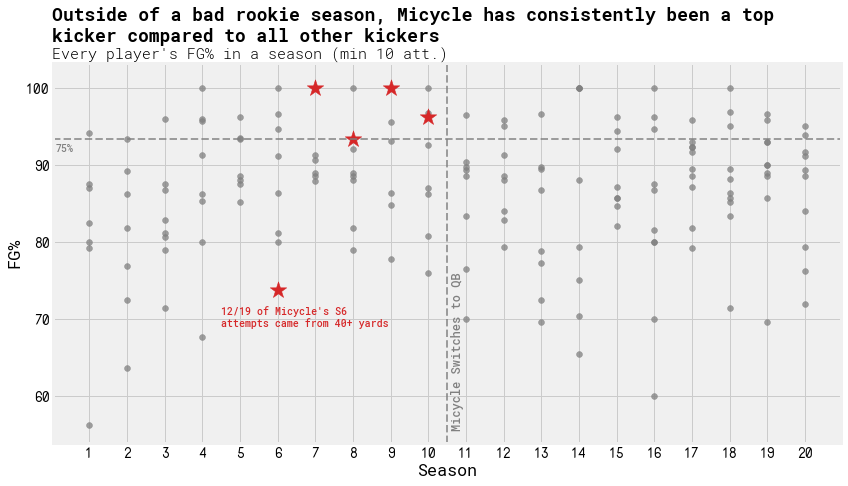

In [7]:
x = 'S'
y = 'FG%'
alph = 0.75
fig = plt.figure(figsize=(12,7),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.scatter(kickDF2[x],kickDF2[y],marker='o',c='gray',s=35,alpha=alph)
plt.scatter(micycleDF[x],micycleDF[y],label='McCormick, M.',s=300,c='tab:red',marker='*',alpha=1)

plt.axvline(10.5,c='gray',alpha=alph,ls='--',lw=2)
plt.text(10.6,56,'Micycle Switches to QB',rotation=90,size=12,color='gray')
plt.axhline(kickDesc['FG%']['75%'],c='gray',alpha=alph,ls='--',lw=2)
plt.text(.1,kickDesc['FG%']['75%']-1.5,'75%',c='gray',size=10)

plt.text(4.5,69,"12/19 of Micycle's S6\nattempts came from 40+ yards",color='tab:red',size=10)
plt.text(0,106,'Outside of a bad rookie season, Micycle has consistently been a top \nkicker compared to all other kickers',weight='bold',size=18)
plt.text(0,103.75,"Every player's FG% in a season (min 10 att.)",size=15,weight='light')
plt.xticks(range(1,21))
plt.xlabel('Season')
plt.ylabel(y)
# plt.legend(bbox_to_anchor=(1, 1.025), loc='upper left', ncol=1)
plt.tight_layout()
plt.savefig('micycle_images/Kicks-Season.png',facecolor=fig.get_facecolor(),bbox_inches='tight')
plt.show()

In [8]:
# kickDF2[kickDF2['FG%'] >= 93.3][['Name','S','FG%']]

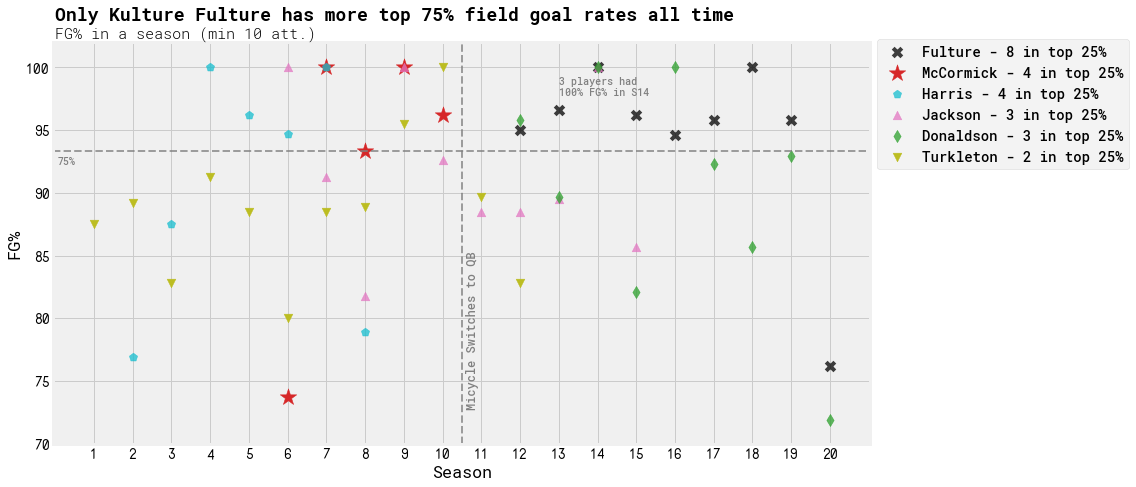

In [9]:
x = 'S'
y = 'FG%'
alph = 0.75
fig = plt.figure(figsize=(16,7),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
# plt.scatter(kickDF2[x],kickDF2[y],marker='o',c='gray',s=35,alpha=alph)

plt.scatter(fultureDF[x],fultureDF[y],label='Fulture - 8 in top 25%',s=75,c='k',marker='x',alpha=alph)
plt.scatter(micycleDF[x],micycleDF[y],label='McCormick - 4 in top 25%',s=300,c='tab:red',marker='*',alpha=1)
plt.scatter(harrisDF[x],harrisDF[y],label='Harris - 4 in top 25%',s=75,c='tab:cyan',marker='p',alpha=alph)
plt.scatter(deanDF[x],deanDF[y],label='Jackson - 3 in top 25%',s=75,c='tab:pink',marker='^',alpha=alph)
plt.scatter(neoDF[x],neoDF[y],label='Donaldson - 3 in top 25%',s=75,c='tab:green',marker='d',alpha=alph)
plt.scatter(turkDF[x],turkDF[y],label='Turkleton - 2 in top 25%',s=75,c='tab:olive',marker='v',alpha=1)

plt.axvline(10.5,c='gray',alpha=alph,ls='--',lw=2)
plt.text(10.6,73,'Micycle Switches to QB',rotation=90,size=12,color='gray')
plt.axhline(kickDesc['FG%']['75%'],c='gray',alpha=alph,ls='--',lw=2)
plt.text(.07,kickDesc['FG%']['75%']-1,'75%',c='gray',size=10)

plt.text(13,97.75,'3 players had\n100% FG% in S14',size=10,color='gray')

plt.text(0,103.75,'Only Kulture Fulture has more top 75% field goal rates all time',weight='bold',size=18)
plt.text(0,102.25,"FG% in a season (min 10 att.)",size=15,weight='light')
plt.xticks(range(1,21))
plt.xlabel('Season')
plt.ylabel(y)
plt.legend(bbox_to_anchor=(1, 1.025), loc='upper left', ncol=1)
plt.tight_layout()
plt.savefig('micycle_images/Kicks-HOF-Season.png',facecolor=fig.get_facecolor(),bbox_inches='tight')
plt.show()

## Punting

In [10]:
puntDF = pd.read_csv('PuntingDF.csv')
puntDF2 = puntDF[puntDF.Punts >= 20]

In [11]:
puntDesc = puntDF2.describe()

In [12]:
pmicycleDF = puntDF2.loc[puntDF2.Player == 'McCormick, M.']
pdeanDF = puntDF2.loc[puntDF2.Player == 'Jackson, D.']
pturkDF = puntDF2.loc[puntDF2.Player == 'Turkleton, T.']
pfultureDF = puntDF2.loc[puntDF2.Player == 'Fulture, K.']
palexDF = puntDF2.loc[puntDF2.Player == 'Dasistwirklichseinnachname, A.']
pfDF = puntDF2.loc[puntDF2.Player == 'Forfeit, N.']
pharrisDF = puntDF2.loc[puntDF2.Player == 'Harris, S.']
pneoDF = puntDF2.loc[puntDF2.Player == 'Donaldson, N.']

In [13]:
puntDF2.sort_values('Avg',ascending=False)[['Name','S','Avg']].head(5)

,Name,S,Avg
34,"Turkleton, T.",5,50.9
75,"McCormick, M.",10,50.3
29,"Ronaldo, C.",4,50.2
172,"Crisco, A.",20,50.0
59,"McCormick, M.",8,49.3


In [14]:
puntDF2['Avg'].quantile(.9)

48.309999999999995

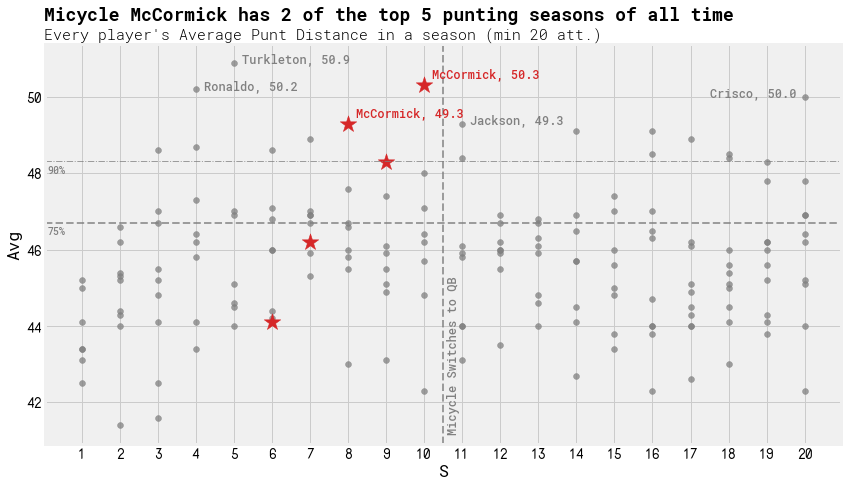

In [15]:
x = 'S'
y = 'Avg'
alph = 0.75
fig = plt.figure(figsize=(12,7),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.scatter(puntDF2[x],puntDF2[y],marker='o',c='gray',s=35,alpha=alph)
# plt.scatter(pturkDF[x],pturkDF[y],label='Turkleton, T.',s=75,c='tab:olive',marker='v',alpha=alph)
# plt.scatter(pharrisDF[x],pharrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p',alpha=alph)
# plt.scatter(pdeanDF[x],pdeanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^',alpha=alph)
plt.scatter(pmicycleDF[x],pmicycleDF[y],label='McCormick, M.',s=300,c='tab:red',marker='*',alpha=1)
# plt.scatter(pfDF[x],pfDF[y],label='Forfeit',s=75,c='tab:blue',marker='>',alpha=alph)
# plt.scatter(pfultureDF[x],pfultureDF[y],label='Fulture, K.',s=75,c='k',marker='x',alpha=alph)
# plt.scatter(palexDF[x],palexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d',alpha=alph)


plt.axhline(puntDF2[y].quantile(.9),c='gray',alpha=alph,ls='-.',lw=1)
plt.text(0.1,puntDF2[y].quantile(.9)-.3,'90%',c='gray',size=10)
plt.axhline(puntDesc[y]['75%'],c='gray',alpha=alph,ls='--',lw=2)
plt.text(0.1,puntDesc[y]['75%']-.3,'75%',c='gray',size=10)
plt.axvline(10.5,c='gray',alpha=alph,ls='--',lw=2)
plt.text(10.6,41.25,'Micycle Switches to QB',rotation=90,size=12,color='gray')

plt.text(5.2,50.9,'Turkleton, 50.9',size=12,color='gray')
plt.text(10.2,50.5,'McCormick, 50.3',size=12,color='tab:red')
plt.text(4.2,50.2,'Ronaldo, 50.2',size=12,color='gray')
plt.text(8.2,49.5,'McCormick, 49.3',size=12,color='tab:red')
plt.text(11.2,49.3,'Jackson, 49.3',size=12,color='gray')
plt.text(17.5,50,'Crisco, 50.0',size=12,color='gray')

plt.text(0,52.,'Micycle McCormick has 2 of the top 5 punting seasons of all time',weight='bold',size=18)
plt.text(0,51.5,"Every player's Average Punt Distance in a season (min 20 att.)",size=15,weight='light')
plt.xticks(range(1,21))
plt.xlabel(x)
plt.ylabel(y)
# plt.legend(bbox_to_anchor=(1, 1.025), loc='upper left', ncol=1)
plt.tight_layout()
plt.savefig('micycle_images/Punts-Season.png',facecolor=fig.get_facecolor(),bbox_inches='tight')
plt.show()

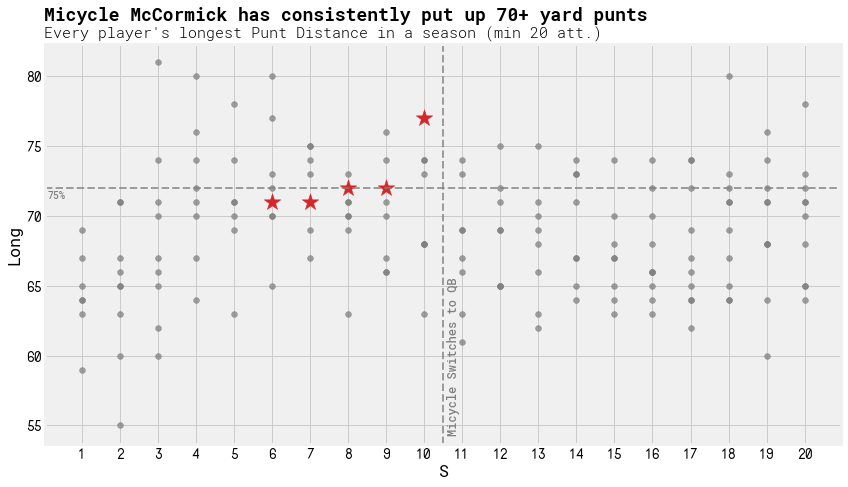

In [16]:
x = 'S'
y = 'Long'
alph = 0.75
fig = plt.figure(figsize=(12,7),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.scatter(puntDF2[x],puntDF2[y],marker='o',c='gray',s=35,alpha=alph)
# plt.scatter(pturkDF[x],pturkDF[y],label='Turkleton, T.',s=75,c='tab:olive',marker='v',alpha=alph)
# plt.scatter(pharrisDF[x],pharrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p',alpha=alph)
# plt.scatter(pdeanDF[x],pdeanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^',alpha=alph)
plt.scatter(pmicycleDF[x],pmicycleDF[y],label='McCormick, M.',s=300,c='tab:red',marker='*',alpha=1)
# plt.scatter(pfDF[x],pfDF[y],label='Forfeit',s=75,c='tab:blue',marker='>',alpha=alph)
# plt.scatter(pfultureDF[x],pfultureDF[y],label='Fulture, K.',s=75,c='k',marker='x',alpha=alph)
# plt.scatter(palexDF[x],palexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d',alpha=alph)

plt.axvline(10.5,c='gray',alpha=alph,ls='--',lw=2)
plt.text(10.6,54.5,'Micycle Switches to QB',rotation=90,size=12,color='gray')
# plt.axhline(puntDF2[y].quantile(.9),c='gray',alpha=alph,ls='-.',lw=1)
# plt.text(0.1,puntDF2[y].quantile(.9)-.75,'90%',c='gray',size=10)
plt.axhline(puntDesc[y]['75%'],c='gray',alpha=alph,ls='--',lw=2)
plt.text(0.1,puntDesc[y]['75%']-.75,'75%',c='gray',size=10)
# plt.axhline(puntDesc[y]['50%'],c='gray',alpha=alph,ls='--',lw=2)
# plt.text(0.1,puntDesc[y]['50%']-.75,'50%',c='gray',size=10)


plt.text(0,84.,'Micycle McCormick has consistently put up 70+ yard punts',weight='bold',size=18)
plt.text(0,82.75,"Every player's longest Punt Distance in a season (min 20 att.)",size=15,weight='light')
plt.xticks(range(1,21))
plt.xlabel(x)
plt.ylabel(y)
# plt.legend(bbox_to_anchor=(1, 1.025), loc='upper left', ncol=1)
plt.tight_layout()
# plt.savefig('micycle_images/Punts-Season.png',facecolor=fig.get_facecolor())
plt.show()

## Passing

In [17]:
passDF = pd.read_csv('PassingDF.csv')

In [18]:
passDF = passDF[passDF.Att >= 50]

In [19]:
passDF.Name = passDF.Name.str.replace('(R) ','',regex=False).str.replace(' (R)','',regex=False)

In [20]:
passDF.Name.unique()

array(['Kyubee, S.', 'Orosz, C.', 'Noble, L.', 'Draxel, V.', 'Boss, M.',
       'Bercovici, J.', 'Christ, J.', 'Hunt, E.', 'Bronko, K.',
       'Pierno, N.', 'Rove, C.', 'Blocksdale, A.', 'Akselsen, M.',
       'Stone, W.', 'Oles, T.', 'Maximus III, B.', 'Applehort, R.',
       'Pennington, B.', 'Fitzpatrick, K.', 'Showbiz, G.',
       'McCormick, M.', 'Falconi, A.', 'Gambino, C.', 'Reese, A.',
       'Bigsby, C.', 'Havran, C.', 'McDummy, W.', 'Francisco, S.',
       'Jenkins, R.', 'Cole, E.', 'Armstrong, F.', 'Wright, D.',
       'Cue, J.', 'Phoenix, B.'], dtype=object)

### Adding in Rushing Stats

In [21]:
rushDF = pd.read_csv('RushingDF.csv')

In [22]:
QBrushDF = rushDF[rushDF.Position == 'QB']
QBrushDF.columns = ['Unnamed: 0', 'teamID', 'ACC', 'AGI', 'ARM', 'Rush Att', 'Rush Avg', 'END', 'G','HND', 'INT', 'KAc', 'KDi', 'L', 'Rush Lg', 'Name', 'OVR', 'PA', 'PBl', 'PF',
       'Player', 'Position', 'RBl', 'S', 'SPE', 'STR', 'T', 'TCK', 'Rush TD',
       'Team', 'W', 'WPct', 'Rush Yards']

In [23]:
QBrushDF.Name = QBrushDF.Name.str.replace('(R) ','',regex=False).str.replace(' (R)','',regex=False)
QBrushDF.Name.unique()

/home/mike/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array(['Kyubee, S.', 'Orosz, C.', 'Noble, L.', 'Draxel, V.',
       'Bercovici, J.', 'Boss, M.', 'Christ, J.', 'Hunt, E.',
       'Strike, M.', 'Bronko, K.', 'Adams, C.', 'Pierno, N.', 'Rove, C.',
       'Blocksdale, A.', 'Akselsen, M.', 'Stone, W.', 'Oles, T.',
       'Maximus III, B.', 'Applehort, R.', 'Pennington, B.',
       'Fitzpatrick, K.', 'Showbiz, G.', 'McCormick, M.', 'Falconi, A.',
       'Gambino, C.', 'Reese, A.', 'Bigsby, C.', 'Havran, C.',
       'McDummy, W.', 'Francisco, S.', 'Jenkins, R.', 'Cole, E.',
       'Armstrong, F.', 'Wright, D.', 'Cue, J.', 'Phoenix, B.'],
      dtype=object)

In [24]:
qbAllDF = pd.concat([passDF[passDF.Name == QBrushDF.Name.unique()[0]].set_index('S'),QBrushDF[QBrushDF.Name == QBrushDF.Name.unique()[0]].set_index('S')],axis=1)
for i in range(1,len(QBrushDF.Name.unique())):
    qbDF = pd.concat([passDF[passDF.Name == QBrushDF.Name.unique()[i]].set_index('S'),QBrushDF[QBrushDF.Name == QBrushDF.Name.unique()[i]].set_index('S')],axis=1)
    qbAllDF = pd.concat([qbAllDF,qbDF])
qbAllDF = qbAllDF.loc[:,~qbAllDF.columns.duplicated()]
qbAllDF = qbAllDF.reset_index()

In [25]:
qbAllDF.columns

Index(['S', 'Unnamed: 0', 'teamID', 'ACC', 'AGI', 'ARM', 'Att', 'Comp', 'END',
       'G', 'HND', 'INT', 'Int', 'KAc', 'KDi', 'L', 'Lg', 'Name', 'OVR', 'PA',
       'PBl', 'PF', 'Pct', 'Player', 'Pos', 'RBl', 'Rating', 'SPE', 'STR', 'T',
       'TCK', 'TD', 'Team', 'W', 'WPct', 'Yards', 'Rush Att', 'Rush Avg',
       'Rush Lg', 'Position', 'Rush TD', 'Rush Yards'],
      dtype='object')

In [26]:
qbAllDF[qbAllDF['Name'] == 'McCormick, M.'][['Name','S','G','Comp','Att','Pct','Yards','TD','Int','Rush Att','Rush Yards','Rush TD']]

,Name,S,G,Comp,Att,Pct,Yards,TD,Int,Rush Att,Rush Yards,Rush TD
108,"McCormick, M.",11,14.0,391.0,635.0,61.6,4433.0,29.0,17.0,14,23,0
109,"McCormick, M.",12,14.0,321.0,573.0,56.0,4019.0,28.0,17.0,94,555,4
110,"McCormick, M.",13,14.0,322.0,534.0,60.3,3964.0,23.0,14.0,51,360,5
111,"McCormick, M.",14,14.0,387.0,674.0,57.4,5007.0,31.0,18.0,75,301,2
112,"McCormick, M.",15,14.0,299.0,524.0,57.1,3429.0,20.0,20.0,18,43,1


### Sacks? Fumbles?

In [27]:
allData = pd.read_csv('all_post19_regular.csv')

In [28]:
def getSacks(player,S):
    sacksDF = allData[(allData.play.str.contains('%s SACKED'%player)) & (allData.S == S)]
    sackList = [int(sacksDF.iloc[b].play.split('for ')[1].split(' yds.')[0]) for b in range(len(sacksDF))]
    return sackList

In [29]:
def sacksDF(player, S):
#     player = row.Name
#     S = row.S
    sackList = getSacks(player,S)
    return len(sackList), -sum(sackList)

In [30]:
qbAllDF['Sacks'] = qbAllDF.apply(lambda row : sacksDF(row['Name'],row['S'])[0] , axis=1)
qbAllDF['Sack Yards'] = qbAllDF.apply(lambda row : sacksDF(row['Name'],row['S'])[1] , axis=1)

In [31]:
def getFumbles(player,S):
    sacksDF = allData[(allData.play.str.contains('FUMBLE by %s'%player)) & (allData.S == S)]
    return len(sacksDF)

In [32]:
getFumbles('McCormick, M.', 12)

3

In [33]:
qbAllDF['Fumbles'] = qbAllDF.apply(lambda row: getFumbles(row.Name,row.S), axis = 1)

In [34]:
qbAllDF[qbAllDF['Name'] == 'McCormick, M.'][['Name','S','G','Comp','Att','Pct','Yards','TD','Int','Rating','Rush Att','Rush Yards','Rush TD','Sacks','Sack Yards','Fumbles']]

,Name,S,G,Comp,Att,Pct,Yards,TD,Int,Rating,Rush Att,Rush Yards,Rush TD,Sacks,Sack Yards,Fumbles
108,"McCormick, M.",11,14.0,391.0,635.0,61.6,4433.0,29.0,17.0,86.6,14,23,0,21,128,0
109,"McCormick, M.",12,14.0,321.0,573.0,56.0,4019.0,28.0,17.0,81.9,94,555,4,26,190,3
110,"McCormick, M.",13,14.0,322.0,534.0,60.3,3964.0,23.0,14.0,86.7,51,360,5,25,174,0
111,"McCormick, M.",14,14.0,387.0,674.0,57.4,5007.0,31.0,18.0,85.1,75,301,2,37,266,2
112,"McCormick, M.",15,14.0,299.0,524.0,57.1,3429.0,20.0,20.0,73.7,18,43,1,41,267,1


In [35]:
qbAllDF['Pct'] = qbAllDF['Comp']/qbAllDF['Att']
qbAllDF['TD:INT'] = qbAllDF['TD']/qbAllDF['Int']
qbAllDF['Att/G'] = qbAllDF['Att']/qbAllDF['G']
qbAllDF['PYd/G'] = qbAllDF['Yards']/qbAllDF['G']
qbAllDF['RYd/G'] = qbAllDF['Rush Yards']/qbAllDF['G']
qbAllDF['Yd/G'] = (qbAllDF['Yards']+qbAllDF['Rush Yards'])/qbAllDF['G']
qbAllDF['TD%'] = qbAllDF['TD']/qbAllDF['Att']
qbAllDF['Int%'] = qbAllDF['Int']/qbAllDF['Att']
qbAllDF['Y/A'] = qbAllDF['Yards']/qbAllDF['Att']
qbAllDF['Y/C'] = qbAllDF['Yards']/qbAllDF['Comp']
qbAllDF['ANY/A'] = (qbAllDF['Yards'] - qbAllDF['Sack Yards'] + 20*qbAllDF['TD'] - 45*qbAllDF['Int'])/(qbAllDF['Att']+qbAllDF['Sacks'])
qbAllDF['TANY/A'] = (qbAllDF['Yards'] + qbAllDF['Rush Yards'] - qbAllDF['Sack Yards'] + 20*(qbAllDF['TD'] + qbAllDF['Rush TD']) - 45*qbAllDF['Int'])/(qbAllDF['Att']+qbAllDF['Sacks'])
qbAllDF['YPC'] = qbAllDF['Rush Yards']/qbAllDF['Rush Att']
qbAllDF['Rating'] = 1/6 * (5*(qbAllDF['Pct']-0.3) + 0.25*(qbAllDF['Y/A']-3) + 20*(qbAllDF['TD%']) + 2.375 - 25*qbAllDF['Int']/qbAllDF['Att'])*100

In [36]:
qbAllDF.sort_values('TANY/A',ascending=False)[['Name','S','TANY/A']].head(25)

,Name,S,TANY/A
166,"Armstrong, F.",20,10.582474
35,"Christ, J.",16,9.138528
66,"Akselsen, M.",7,8.917415
33,"Christ, J.",14,8.819473
164,"Armstrong, F.",18,8.812808
170,"Cue, J.",20,8.558185
67,"Akselsen, M.",8,8.511247
165,"Armstrong, F.",19,8.467105
124,"Gambino, C.",14,8.428571
153,"Jenkins, R.",16,8.373711


### Graphs

In [37]:
passDesc = qbAllDF.describe()
passDesc[['S','Att','Comp','Pct','Yards','TD','Int','Rating','TANY/A']]

,S,Att,Comp,Pct,Yards,TD,Int,Rating,TANY/A
count,172.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,10.837209,519.423529,298.876471,0.573500,3603.576471,22.500000,13.441176,81.711841,5.921473
std,5.937019,92.903255,60.219834,0.034197,860.453814,9.131032,4.786514,12.299021,1.609566
min,1.000000,93.000000,50.000000,0.435393,581.000000,1.000000,3.000000,35.338262,1.181818
25%,6.000000,465.500000,263.250000,0.555772,3075.250000,17.000000,10.000000,76.024403,5.065210
50%,11.000000,526.500000,300.500000,0.576497,3615.000000,22.000000,13.000000,82.615677,5.962856
75%,16.000000,581.500000,341.750000,0.594770,4260.000000,28.000000,16.000000,90.922863,7.035522
max,20.000000,702.000000,420.000000,0.677632,5545.000000,45.000000,35.000000,105.656962,10.582474


In [38]:
qbCorr = qbAllDF.corr()

In [39]:
micyclePassDF = qbAllDF[qbAllDF.Name == 'McCormick, M.']

In [40]:
micyclePassDF[['Name','S','G','Comp','Att','Pct','Yards','TD','Int','Rating','Rush Att','Rush Yards','Rush TD','ANY/A','TANY/A']]

,Name,S,G,Comp,Att,Pct,Yards,TD,Int,Rating,Rush Att,Rush Yards,Rush TD,ANY/A,TANY/A
108,"McCormick, M.",11,14.0,391.0,635.0,0.615748,4433.0,29.0,17.0,86.551837,14,23,0,6.280488,6.315549
109,"McCormick, M.",12,14.0,321.0,573.0,0.560209,4019.0,28.0,17.0,81.918994,94,555,4,6.050083,7.110184
110,"McCormick, M.",13,14.0,322.0,534.0,0.602996,3964.0,23.0,14.0,86.696317,51,360,5,6.475850,7.298748
111,"McCormick, M.",14,14.0,387.0,674.0,0.574184,5007.0,31.0,18.0,85.089021,75,301,2,6.400844,6.880450
112,"McCormick, M.",15,14.0,299.0,524.0,0.570611,3429.0,20.0,20.0,73.719784,18,43,1,4.711504,4.823009


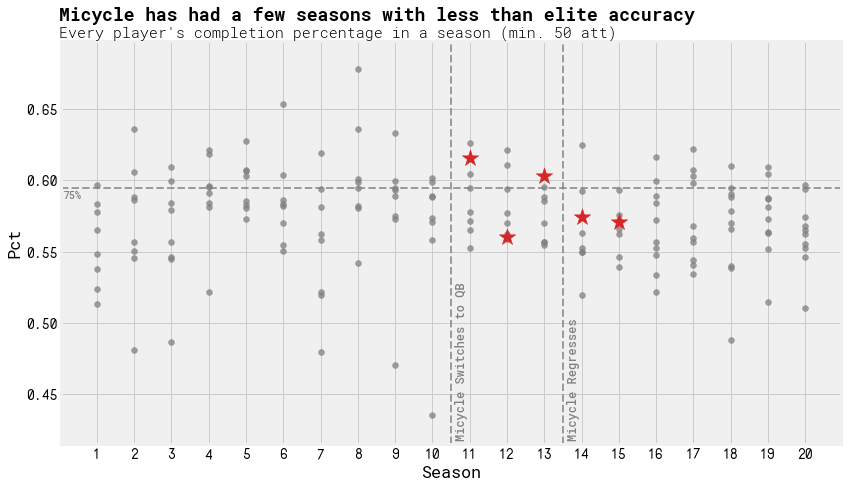

In [41]:
x = 'S'
y = 'Pct'
alph = 0.75
fig = plt.figure(figsize=(12,7),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.scatter(qbAllDF[x],qbAllDF[y],marker='o',c='gray',s=35,alpha=alph)
plt.scatter(micyclePassDF[x],micyclePassDF[y],label='McCormick, M.',s=300,c='tab:red',marker='*',alpha=1)

plt.axhline(passDesc['Pct']['75%'],c='gray',alpha=alph,ls='--',lw=2)
plt.text(0.1,passDesc['Pct']['75%']-.0075,'75%',c='gray',size=10)
plt.axvline(10.5,c='gray',alpha=alph,ls='--',lw=2)
plt.text(10.6,.42,'Micycle Switches to QB',rotation=90,size=12,color='gray')
plt.axvline(13.5,c='gray',alpha=alph,ls='--',lw=2)
plt.text(13.6,.42,'Micycle Regresses',rotation=90,size=12,color='gray')

plt.text(0,.712,'Micycle has had a few seasons with less than elite accuracy',weight='bold',size=18)
plt.text(0,.7,"Every player's completion percentage in a season (min. 50 att)",size=15,weight='light')
plt.xticks(range(1,21))
plt.xlabel('Season')
plt.ylabel(y)
# plt.legend(bbox_to_anchor=(1, 1.025), loc='upper left', ncol=1)
plt.tight_layout()
plt.savefig('micycle_images/PassPct-Season.png',facecolor=fig.get_facecolor(),bbox_inches='tight')
plt.show()

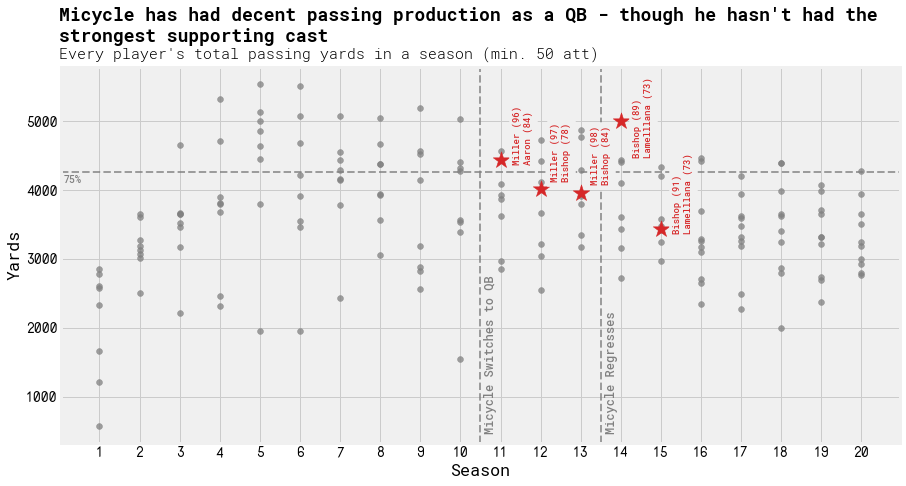

In [42]:
x = 'S'
y = 'Yards'
alph = 0.75
fig = plt.figure(figsize=(13,7),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')


plt.text(11.3,4400,'Miller (96)\nAaron (84)',rotation=90,size=9,color='tab:red',backgroundcolor='#f0f0f0')
plt.text(12.25,4150,'Miller (97)\nBishop (78)',rotation=90,size=9,color='tab:red',backgroundcolor='#f0f0f0')
plt.text(13.25,4100,'Miller (98)\nBishop (84)',rotation=90,size=9,color='tab:red',backgroundcolor='#f0f0f0')
plt.text(14.3,4500,'Bishop (89)\nLamelllana (73)',rotation=90,size=9,color='tab:red',backgroundcolor='#f0f0f0')
plt.text(15.3,3400,'Bishop (91)\nLamelllana (73)',rotation=90,size=9,color='tab:red',backgroundcolor='#f0f0f0')

plt.scatter(passDF[x],passDF[y],marker='o',c='gray',s=35,alpha=alph)
plt.scatter(micyclePassDF[x],micyclePassDF[y],label='McCormick, M.',s=300,c='tab:red',marker='*',alpha=1)

plt.axhline(passDesc['Yards']['75%'],c='gray',alpha=alph,ls='--',lw=2)
plt.text(0.1,passDesc['Yards']['75%']-150,'75%',c='gray',size=10)
plt.axvline(10.5,c='gray',alpha=alph,ls='--',lw=2)
plt.text(10.6,500,'Micycle Switches to QB',rotation=90,size=12,color='gray')
plt.axvline(13.5,c='gray',alpha=alph,ls='--',lw=2)
plt.text(13.6,500,'Micycle Regresses',rotation=90,size=12,color='gray')



plt.text(0,6150,"Micycle has had decent passing production as a QB - though he hasn't had the \nstrongest supporting cast",weight='bold',size=18)
plt.text(0,5900,"Every player's total passing yards in a season (min. 50 att)",size=15,weight='light')
plt.xticks(range(1,21))
plt.xlabel('Season')
plt.ylabel(y)
# plt.legend(bbox_to_anchor=(1, 1.025), loc='upper left', ncol=1)
plt.tight_layout()
plt.savefig('micycle_images/PassYard-Season.png',facecolor=fig.get_facecolor(),bbox_inches='tight')
plt.show()

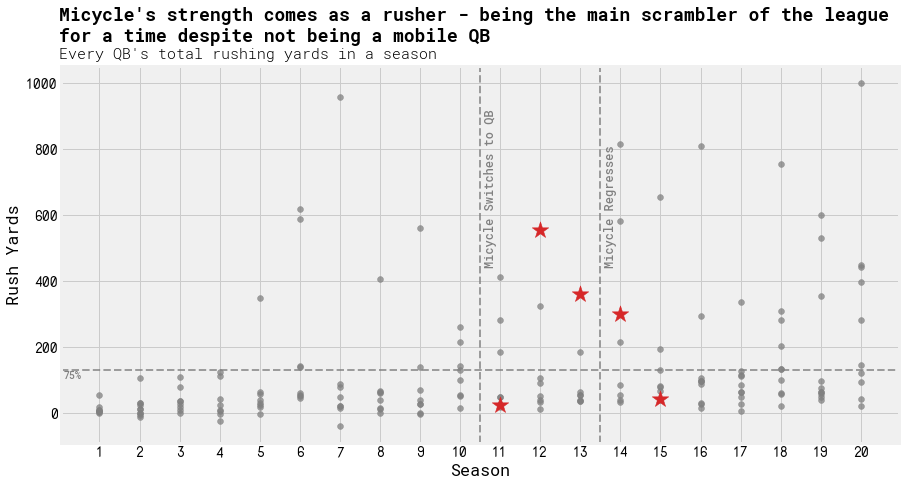

In [52]:
x = 'S'
y = 'Rush Yards'
alph = 0.75
fig = plt.figure(figsize=(13,7),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')

plt.scatter(qbAllDF[x],qbAllDF[y],marker='o',c='gray',s=35,alpha=alph)
plt.scatter(micyclePassDF[x],micyclePassDF[y],label='McCormick, M.',s=300,c='tab:red',marker='*',alpha=1)

plt.axhline(passDesc[y]['75%'],c='gray',alpha=alph,ls='--',lw=2)
plt.text(0.1,passDesc[y]['75%']-25,'75%',c='gray',size=10)
plt.axvline(10.5,c='gray',alpha=alph,ls='--',lw=2)
plt.text(10.6,450,'Micycle Switches to QB',rotation=90,size=12,color='gray')
plt.axvline(13.5,c='gray',alpha=alph,ls='--',lw=2)
plt.text(13.6,450,'Micycle Regresses',rotation=90,size=12,color='gray')



plt.text(0,1125,"Micycle's strength comes as a rusher - being the main scrambler of the league\nfor a time despite not being a mobile QB",weight='bold',size=18)
plt.text(0,1075,"Every QB's total rushing yards in a season",size=15,weight='light')
plt.xticks(range(1,21))
plt.xlabel('Season')
plt.ylabel(y)
# plt.legend(bbox_to_anchor=(1, 1.025), loc='upper left', ncol=1)
plt.tight_layout()
plt.savefig('micycle_images/RushYard-Season.png',facecolor=fig.get_facecolor(),bbox_inches='tight')
plt.show()

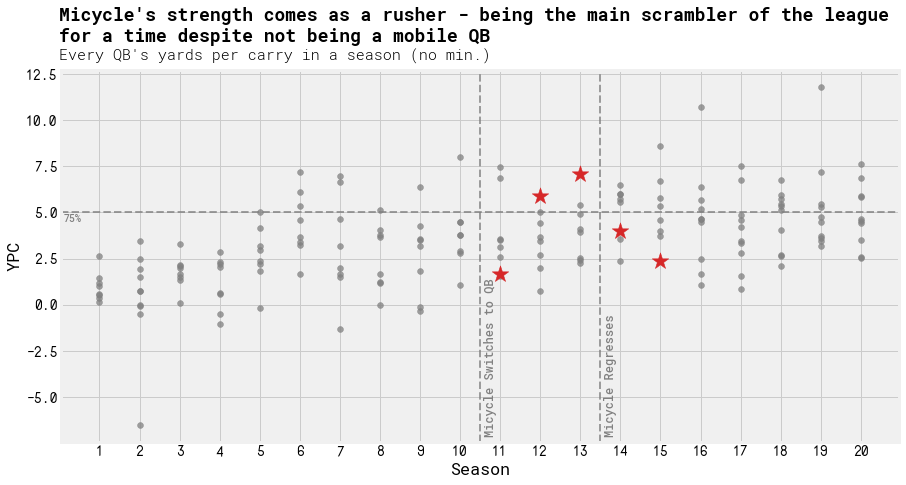

In [44]:
x = 'S'
y = 'YPC'
alph = 0.75
fig = plt.figure(figsize=(13,7),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')

plt.scatter(qbAllDF[x],qbAllDF[y],marker='o',c='gray',s=35,alpha=alph)
plt.scatter(micyclePassDF[x],micyclePassDF[y],label='McCormick, M.',s=300,c='tab:red',marker='*',alpha=1)

plt.axhline(passDesc[y]['75%'],c='gray',alpha=alph,ls='--',lw=2)
plt.text(0.1,passDesc[y]['75%']-.5,'75%',c='gray',size=10)
plt.axvline(10.5,c='gray',alpha=alph,ls='--',lw=2)
plt.text(10.6,-7,'Micycle Switches to QB',rotation=90,size=12,color='gray')
plt.axvline(13.5,c='gray',alpha=alph,ls='--',lw=2)
plt.text(13.6,-7,'Micycle Regresses',rotation=90,size=12,color='gray')



plt.text(0,14.25,"Micycle's strength comes as a rusher - being the main scrambler of the league\nfor a time despite not being a mobile QB",weight='bold',size=18)
plt.text(0,13.25,"Every QB's yards per carry in a season (no min.)",size=15,weight='light')
plt.xticks(range(1,21))
plt.xlabel('Season')
plt.ylabel(y)
# plt.legend(bbox_to_anchor=(1, 1.025), loc='upper left', ncol=1)
plt.tight_layout()
plt.savefig('micycle_images/RushYPC-Season.png',facecolor=fig.get_facecolor(),bbox_inches='tight')
plt.show()

In [45]:
qbAllDF.sort_values('YPC',ascending=False)[['Player','S','Rush Att','YPC']].head(10)

,Player,S,Rush Att,YPC
156,"Jenkins, R.",19,5,11.800000
138,"Havran (R), C.",16,10,10.700000
106,"Showbiz, G.",15,15,8.600000
62,"Blocksdale, A.",10,27,8.000000
147,"McDummy, W.",20,58,7.637931
134,"Bigsby, C.",17,15,7.533333
79,"Maximus III, B.",11,55,7.472727
58,"Blocksdale, A.",6,20,7.200000
168,"Wright, D.",19,74,7.175676
110,"McCormick, M.",13,51,7.058824


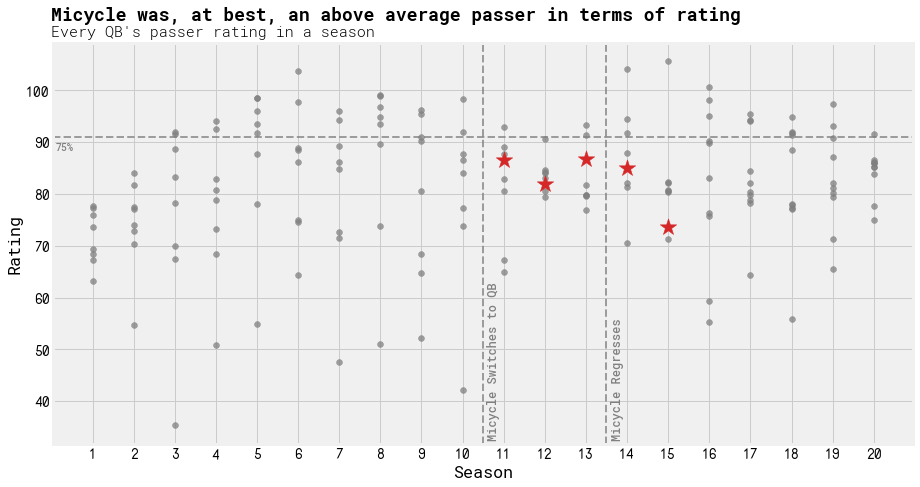

In [46]:
x = 'S'
y = 'Rating'
alph = 0.75
fig = plt.figure(figsize=(13,7),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')

plt.scatter(qbAllDF[x],qbAllDF[y],marker='o',c='gray',s=35,alpha=alph)
plt.scatter(micyclePassDF[x],micyclePassDF[y],label='McCormick, M.',s=300,c='tab:red',marker='*',alpha=1)

plt.axhline(passDesc[y]['75%'],c='gray',alpha=alph,ls='--',lw=2)
plt.text(0.1,passDesc[y]['75%']-2.5,'75%',c='gray',size=10)
plt.axvline(10.5,c='gray',alpha=alph,ls='--',lw=2)
plt.text(10.6,33,'Micycle Switches to QB',rotation=90,size=12,color='gray')
plt.axvline(13.5,c='gray',alpha=alph,ls='--',lw=2)
plt.text(13.6,33,'Micycle Regresses',rotation=90,size=12,color='gray')



plt.text(0,113.5,"Micycle was, at best, an above average passer in terms of rating",weight='bold',size=18)
plt.text(0,110.5,"Every QB's passer rating in a season",size=15,weight='light')
plt.xticks(range(1,21))
plt.xlabel('Season')
plt.ylabel(y)
# plt.legend(bbox_to_anchor=(1, 1.025), loc='upper left', ncol=1)
plt.tight_layout()
plt.savefig('micycle_images/Rating-Season.png',facecolor=fig.get_facecolor(),bbox_inches='tight')
plt.show()

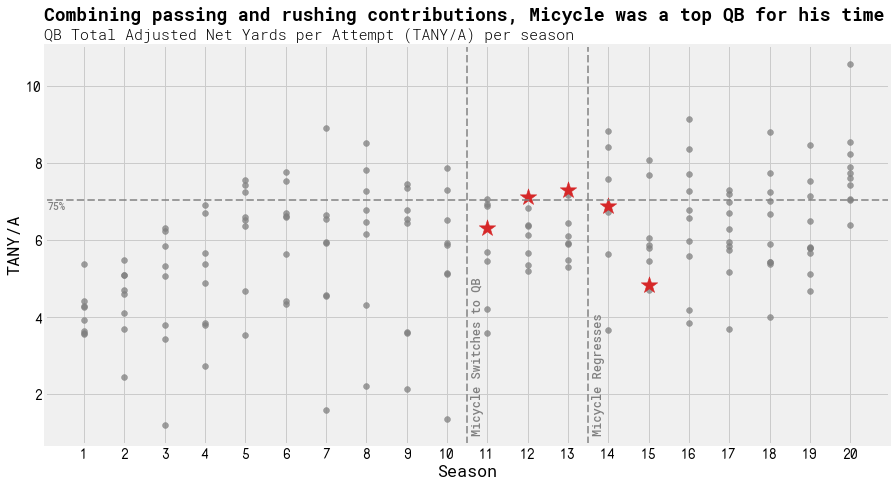

In [47]:
x = 'S'
y = 'TANY/A'
alph = 0.75
fig = plt.figure(figsize=(13,7),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')

plt.scatter(qbAllDF[x],qbAllDF[y],marker='o',c='gray',s=35,alpha=alph)
plt.scatter(micyclePassDF[x],micyclePassDF[y],label='McCormick, M.',s=300,c='tab:red',marker='*',alpha=1)

plt.axhline(passDesc[y]['75%'],c='gray',alpha=alph,ls='--',lw=2)
plt.text(0.1,passDesc[y]['75%']-.25,'75%',c='gray',size=10)
plt.axvline(10.5,c='gray',alpha=alph,ls='--',lw=2)
plt.text(10.6,1,'Micycle Switches to QB',rotation=90,size=12,color='gray')
plt.axvline(13.5,c='gray',alpha=alph,ls='--',lw=2)
plt.text(13.6,1,'Micycle Regresses',rotation=90,size=12,color='gray')



plt.text(0,11.7,"Combining passing and rushing contributions, Micycle was a top QB for his time",weight='bold',size=18)
plt.text(0,11.2,"QB Total Adjusted Net Yards per Attempt (TANY/A) per season",size=15,weight='light')
plt.xticks(range(1,21))
plt.xlabel('Season')
plt.ylabel(y)
# plt.legend(bbox_to_anchor=(1, 1.025), loc='upper left', ncol=1)
plt.tight_layout()
plt.savefig('micycle_images/TANYA-Season.png',facecolor=fig.get_facecolor(),bbox_inches='tight')
plt.show()

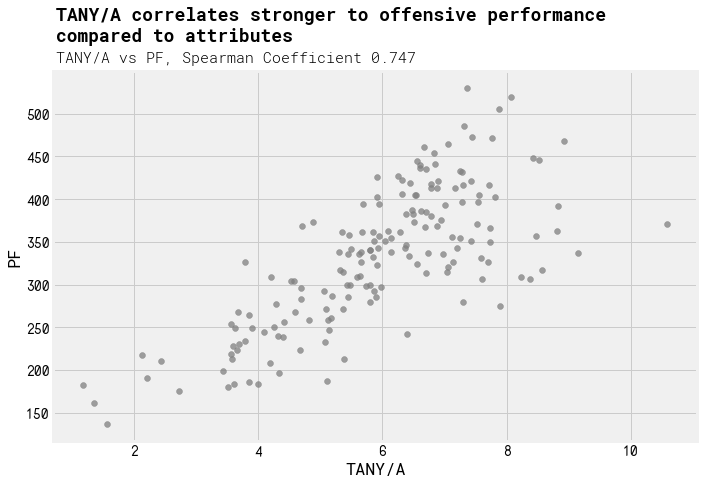

In [48]:
x = 'TANY/A'
y = 'PF'
alph = 0.75
fig = plt.figure(figsize=(10,7),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.scatter(qbAllDF[x],qbAllDF[y],marker='o',c='gray',s=35,alpha=alph)
# plt.scatter(micyclePassDF[x],micyclePassDF[y],label='McCormick, M.',s=300,c='tab:red',marker='*',alpha=1)
plt.text(0.75,585,'TANY/A correlates stronger to offensive performance\ncompared to attributes',weight='bold',size=18)
plt.text(0.75,560,'%s vs %s, Spearman Coefficient %.3f'%(x,y,qbCorr.loc[y][x]),size=15,weight='light')
plt.xlabel(x)
plt.ylabel(y)
# plt.legend()
plt.tight_layout()
plt.savefig('micycle_images/Pass-%s-%s.png'%('TANYA',y),facecolor=fig.get_facecolor(),bbox_inches='tight')
plt.show()

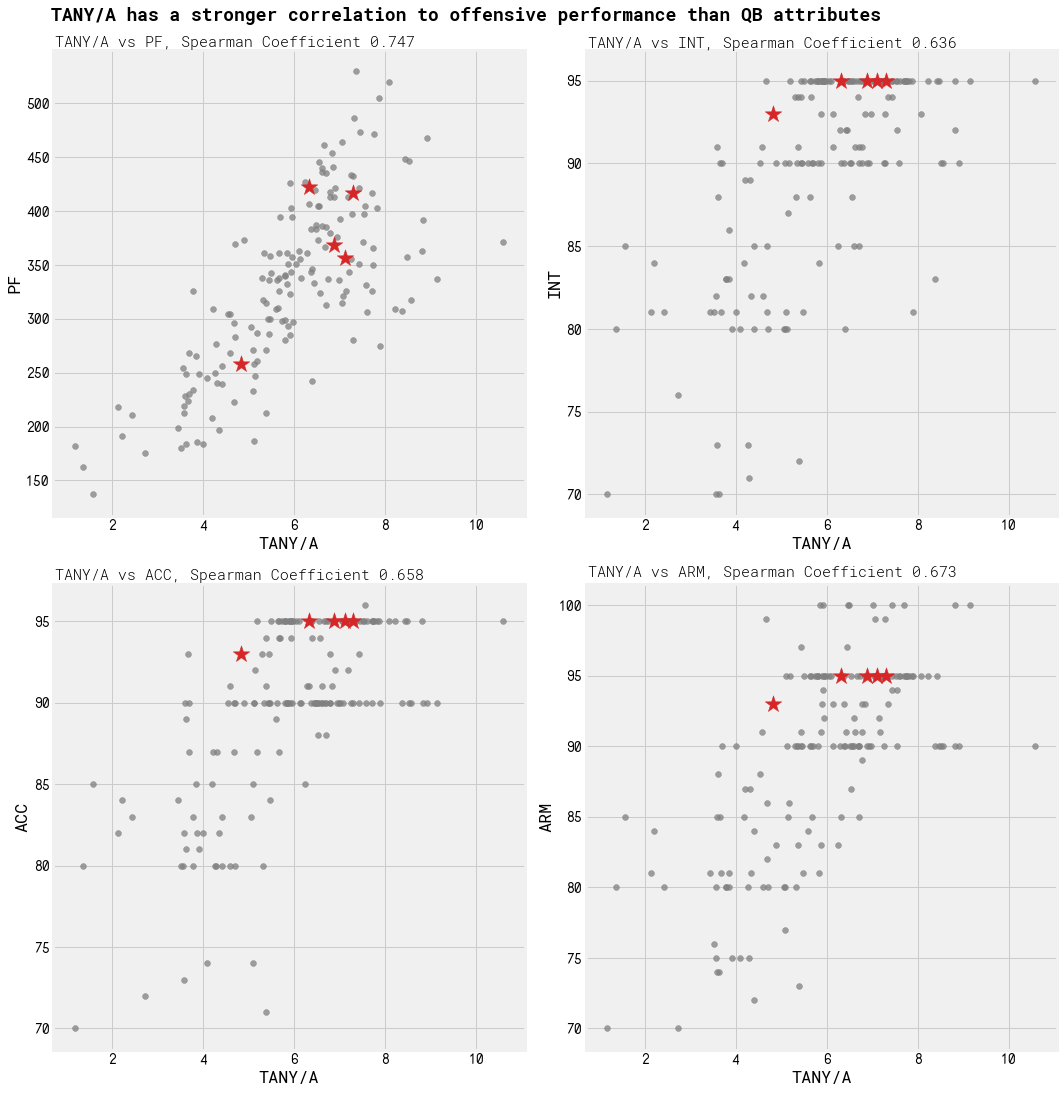

In [49]:
x = 'TANY/A'
alph = 0.75
fig = plt.figure(figsize=(15,15),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'

fig.add_subplot(2,2,1)
y = 'PF'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.scatter(qbAllDF[x],qbAllDF[y],marker='o',c='gray',s=35,alpha=alph)
plt.scatter(micyclePassDF[x],micyclePassDF[y],label='McCormick, M.',s=300,c='tab:red',marker='*',alpha=1)
plt.figtext(0.055,1,'TANY/A has a stronger correlation to offensive performance than QB attributes',weight='bold',size=18)
plt.text(0.75,552.5,'%s vs %s, Spearman Coefficient %.3f'%(x,y,qbCorr.loc[y][x]),size=15,weight='light')
plt.xlabel(x)
plt.ylabel(y)

fig.add_subplot(2,2,2)
y = 'INT'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.scatter(qbAllDF[x],qbAllDF[y],marker='o',c='gray',s=35,alpha=alph)
plt.scatter(micyclePassDF[x],micyclePassDF[y],label='McCormick, M.',s=300,c='tab:red',marker='*',alpha=1)
plt.text(0.75,97,'%s vs %s, Spearman Coefficient %.3f'%(x,y,qbCorr.loc[y][x]),size=15,weight='light')
plt.xlabel(x)
plt.ylabel(y)

fig.add_subplot(2,2,3)
y = 'ACC'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.scatter(qbAllDF[x],qbAllDF[y],marker='o',c='gray',s=35,alpha=alph)
plt.scatter(micyclePassDF[x],micyclePassDF[y],label='McCormick, M.',s=300,c='tab:red',marker='*',alpha=1)
plt.text(0.75,97.55,'%s vs %s, Spearman Coefficient %.3f'%(x,y,qbCorr.loc[y][x]),size=15,weight='light')
plt.xlabel(x)
plt.ylabel(y)

fig.add_subplot(2,2,4)
y = 'ARM'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.scatter(qbAllDF[x],qbAllDF[y],marker='o',c='gray',s=35,alpha=alph)
plt.scatter(micyclePassDF[x],micyclePassDF[y],label='McCormick, M.',s=300,c='tab:red',marker='*',alpha=1)
plt.text(0.75,102.,'%s vs %s, Spearman Coefficient %.3f'%(x,y,qbCorr.loc[y][x]),size=15,weight='light')
plt.xlabel(x)
plt.ylabel(y)
# plt.legend()
plt.tight_layout()
plt.savefig('images/Pass-TANYA-atts.png',facecolor=fig.get_facecolor(),bbox_inches='tight')
plt.show()

In [50]:
qbCorr.sort_values('TANY/A',ascending=False)[['TANY/A']]

,TANY/A
TANY/A,1.000000
ANY/A,0.955133
Rating,0.870936
Y/A,0.836968
PF,0.746505
TD%,0.738952
TD:INT,0.730876
Y/C,0.727512
OVR,0.718084
Yd/G,0.714196
